# Interaction and Polynomials

enrich feature representation especially for linear model by interacting features and using polynoms.

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import numpy as np
import matplotlib.pyplot as plt

# binning the data from binning notebook
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

bins = np.linspace(-3, 3, 11)

which_bin = np.digitize(X, bins=bins)

# using one-hot encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin) # find the unique valuse which appear in bin
X_binned = encoder.transform(which_bin) # transform the bins

# apply one hot encoder
line_binned = encoder.transform(np.digitize(line, bins=bins))

In [2]:
# adding binned features to the starting dataset
# the total feature is 11
X_combined = np.hstack([X, X_binned])
print("Combined shape ", X_combined.shape)

Combined shape  (100, 11)


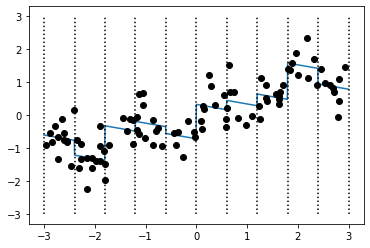

In [5]:
# test the combined values using LinearRegression
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label="linear regression combined")

# plot vertical line to separate the bins
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ":", c="k")

plt.plot(X[:,0], y, 'o', c='k')

In [6]:
# we need separate slope for each bins
# this could be achieved by adding interaction
# or product feature that indicates which bin is
# a data point and where it lies on the X-axis

X_product = np.hstack([X_binned, X * X_binned])
print("Product shape ", X_product.shape)

Product shape  (100, 20)


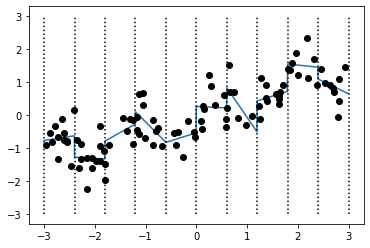

In [9]:
reg = LinearRegression().fit(X_product, y)

# combined the binned line and the product
# of line and binned line
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label="linear regression product")

# plot vertical line to separate the bins
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ":", c="k")

plt.plot(X[:,0], y, 'o', c='k')

In [10]:
# using binning is a way to expand a continous features
# another way is using Polynomials

from sklearn.preprocessing import PolynomialFeatures

# create up to 10 degree polynoms
# the parameter include_bias default True
# adds a features that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

print("X_poly.shape ", X_poly.shape)

X_poly.shape  (100, 10)


In [11]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [14]:
# get the exponent name for each feature
print("Polynomial feature names {}".format(poly.get_feature_names()))

Polynomial feature names ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


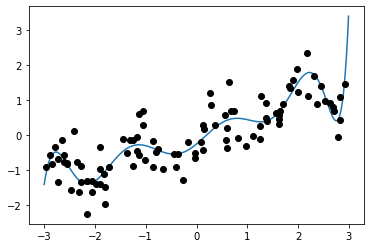

In [15]:
# using the polynomial features with linear regression  

reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label="Polynomial linear regression")
plt.plot(X[:,0], y, 'o', c='k')

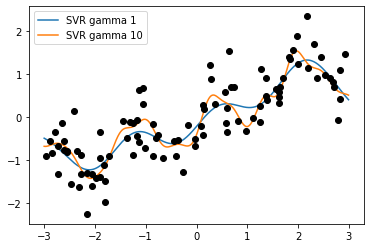

In [18]:
# using SVR as comparison
# higher the polynomial degreee then
# more extreme the model

from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma= gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label="SVR gamma {}".format(gamma))

plt.plot(X[:,0], y, 'o', c='k')
plt.legend()

In [19]:
# applying using boston dataset
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# rescale using minmax
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# extract polynomial features and interactions
# using degree of 2
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [20]:
# get the exponent name for each feature
print("Polynomial feature names {}".format(poly.get_feature_names()))

Polynomial feature names ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [21]:
# comparing the performance using Ridge
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


In [22]:
# with random forest the result is better
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.807
Score with interactions: 0.790


adding interaction and polynomials slightly decrease the performance